In [1]:
from all import*
bigboy = getBigBoyDataFrame()

In [11]:
bigboy.columns

Index(['amendment_id', 'person_id', 'person_full_name', 'document_eu_id',
       'procedure_interinst_id', 'date', 'policy_area_name', 'policy_area_id',
       'policy_area_level', 'organization_abbr'],
      dtype='object')

In [14]:
itreonly = bigboy.loc[bigboy["organization_abbr"] == "ITRE"]
print(itreonly)

         amendment_id  person_id       person_full_name document_eu_id  \
234                47       1369          Pascal Canfin      PE736.476   
235                50       1369          Pascal Canfin      PE736.476   
236                55       1369          Pascal Canfin      PE736.476   
237                59       1369          Pascal Canfin      PE736.476   
238                66       1369          Pascal Canfin      PE736.476   
...               ...        ...                    ...            ...   
2968638        391584       1452           Nicola Danti      PE754.723   
2968639        391584       2210          Martin Hojsík      PE754.723   
2968640        391584       2353         Andreas Glueck      PE754.723   
2968641        391584       1977            Nicola Beer      PE754.723   
2968642        391589       1838  Zdzisław Krasnodębski      PE754.723   

        procedure_interinst_id        date  \
234             2021/0423(COD)  2022-09-15   
235             202

In [15]:
pedno = itreonly.groupby(itreonly.procedure_interinst_id)

In [16]:
"""
# This is how we can now iterate over procedures
for i, x in pedno:
    do_something(i,x)
"""

2019/0151(COD)
         amendment_id  person_id person_full_name document_eu_id  \
1567779         18183       1361    Marisa Matias      PE648.286   
1567780         18183       1361    Marisa Matias      PE648.286   
1567781         18183       1361    Marisa Matias      PE648.286   
1567782         18198       1361    Marisa Matias      PE648.286   
1567783         18198       1361    Marisa Matias      PE648.286   
...               ...        ...              ...            ...   
1570312         40996       1804    Klaus Buchner      PE650.626   
1570313         40996       1804    Klaus Buchner      PE650.626   
1570314         41004       1804    Klaus Buchner      PE650.626   
1570315         41004       1804    Klaus Buchner      PE650.626   
1570316         41004       1804    Klaus Buchner      PE650.626   

        procedure_interinst_id        date  \
1567779         2019/0151(COD)  2020-03-12   
1567780         2019/0151(COD)  2020-03-12   
1567781         2019/0151(COD)

In [17]:
itre_members = getImportantCommitteeMembers(comm="ITRE")

In [24]:
coh_overtime = []
for i, x in pedno:
    pdedgelist = nx.from_pandas_edgelist(x, source='amendment_id', target = 'person_full_name')
    coh_overtime += [cohesiveness(pdedgelist, pdedgelist)]

print(coh_overtime)

[0.010213032581453634, 0.0058379578246392895, 0.029111338100102146, 0.02702702702702703, 0.018672930123311803, 0.028991596638655463, 0.009821428571428571, 0.021551724137931036, 0.011486421267196983, 0.0107810856541821, 0.02684326710816777, 0.019544159544159546, 0.017402597402597402, 0.01843942783540099, 0.029829712272460365, 0.014868527063649014, 0.012963941038075575, 0.00631398252184769, 0.009445216341768066, 0.011591626981443738, 0.003574509480021291, 0.008706518205461639, 0.031061929722384002, 0.003656045816511605, 0.06471631205673758, 0.024683544303797468, 0.03527336860670194, 0.011707624590514573, 0.020642861250071875, 0.008134733956047864, 0.025634920634920635, 0.020609929078014184, 0.04599686028257457, 0.021096238925600298, 0.024005654436805243, 0.017267460113594202, 0.038559754851889685, 0.01880990325694148, 0.004801762193173643, 0.024154589371980676, 0.005235904286020548, 0.007748114937843897, 0.009567492027089978, 0.011405849421859467, 0.04066985645933014, 0.00430277251841199

In [25]:
coh_df = pd.DataFrame(coh_overtime)

<AxesSubplot:>

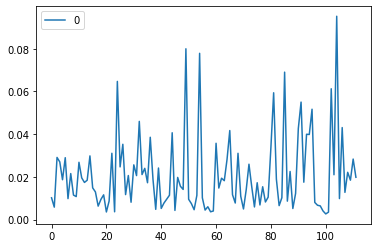

In [26]:
coh_df.plot()